
# <p style="text-align: center;">EE 461P: Data Science Principles</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 75</p>
## <p style="text-align: center;">Due: Thursday, October 25th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).** In addition, please convert **your filename including your EID** (ex. ss324.jpynb or ss324_mj345.jpypb).

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

## <p style="text-align: center;"> Submitted by Bryce Fuller (BGF295) and Caleb Johnson (CDJ2273)

# Question 1a - Stochastic Gradient Descent (25pts)

# 1.a) 
 (4pts) Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1x_1 + w_2x_1^2 + w_3x_1x_2 $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, include the image in your notebook.


# Answer:

### Given that our model is:

$\hat{y}=w_{0} + w_{1}x_{1} + w_{2}x_{1}^{2} + w_{3}x_{1}x_{2}$, 

### We define the loss function: 

$\sum(y - \hat{y})^{2}$ = $\sum(y - (w_{0} + w_{1}x_{1} + w_{2}x_{1}^{2} + w_{3}x_{1}x_{2}))^{2}$

### To find a weight's 'update' in SGD, we may use the formula:

$w_{inew} = w_{i} - \eta [\frac{\partial }{\partial w_{i}}(w_{0} + w_{1}x_{1} + w_{2}x_{1}^{2} + w_{3}x_{1}x_{2} -y)^{2}]$

### The updated weights will be:

$\begin{bmatrix}w_{0new} \\ w_{1new} \\ w_{2new} \\ w_{3new}\end{bmatrix} = \begin{bmatrix}w_{0} \\ w_{1} \\ w_{2} \\ w_{3}\end{bmatrix} - 2\eta\begin{bmatrix} \\ (w_{0} + w_{1}x_{1} + w_{2}x_{1}^2 + w_{3}x_{1}x_{2} - y) \\ (w_{1}x_{1} + w_{2}x_{1}^3 + w_{3}x_{1}^2x_{2} - x_{1}y) \\ (w_{0}x_{1}^2 + w_{1}x_{1}^3 + w_{2}x_{1}^4 + w_{3}x_{1}^3x_{2} - x_{1}^2y) \\ (w_{0}x_{1}x_{2} + w_{1}x_{1}^2x_{2} + w_{2}x_{1}^3x_{2} + w_{3}x_{1}^2x_{2}^2 - x_{1}x_{2}y)\end{bmatrix}$ 



# 1.2)
 2. (12pts) Write Python code for an SGD solution to the non-linear model $$ y = w_0 + w_1x_1 + w_2x_1^2 + w_3x_1x_2$$ Try to format similarly to scikit-learn's models. Your class should take as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y and a choice of update_rule as 'sgd' or 'sgd_momentum' or 'rmsprop'(Notes on implementation below). The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 15 epochs, using learning rates: [.0001, .001, .01, 0.1, 1, 10, 100] and regularization constants in the range: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the best 2 combinations of learning_rate and regularization for SGD, SGD-Momentum and RMSProp. I.e., you should have one plot of MSE and another for the parameter updates for SGD, SGD-Momentum and RMSProp (6 plots total).

In [1]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

class SGD:
    
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.history = pd.DataFrame(columns=['w0','w1','w2','w3','MSE'])
        
    def predict(self, X, W):
        yhat = pd.DataFrame(np.random.random_sample(50))
        for i in range(0,X.shape[0]):
            yhat.iloc[i,0] = (W.iloc[0,0] + W.iloc[1,0]*X.iloc[i,0] + W.iloc[2,0]*X.iloc[i,0]**2 + W.iloc[3,0]*X.iloc[i,0]*X.iloc[i,1])

        return yhat 
        
    def fit(self, X, y, update_rule, rc):
        W = pd.DataFrame(np.random.random_sample(4))
        self.history = self.history.append({'w0': W.iloc[0,0] ,'w1': W.iloc[1,0] , 'w2': W.iloc[2,0] , 'w3': W.iloc[3,0] ,'MSE': MSE(y,self.predict(X,W))},ignore_index=True)
        
        """FIT WITH Vanilla SGD"""
        if(update_rule == 'sgd'):         
            a = 2*(self.learning_rate)
            
            for i in range(0,  self.epochs):     
               for j in range(0, len(y)):
                
                #GET GRADIENT OF EACH FEATURE
                v0 = (W.iloc[0,0] + W.iloc[1,0]*X.iloc[j,0] + W.iloc[2, 0]*X.iloc[j,0]**2 + W.iloc[3, 0]*X.iloc[j, 0]*X.iloc[j, 1] - y.iloc[j])
                v1 = (W.iloc[1,0]*X.iloc[j,0] + W.iloc[2, 0]*X.iloc[j, 0]**3 + W.iloc[3, 0]*(X.iloc[j, 0]**2)*X.iloc[j, 1] - X.iloc[j, 0]*y.iloc[j])
                v2 = (W.iloc[0,0]*X.iloc[j,0]**2 + W.iloc[1, 0]*X.iloc[j, 0]**3 + W.iloc[2, 0]*X.iloc[j, 0]**4 + W.iloc[3, 0]*(X.iloc[j, 0]**3)*X.iloc[j,  1] - (X.iloc[j, 0]**2)*y.iloc[j])
                v3 = (W.iloc[0,0]*X.iloc[j,0]*X.iloc[j,1] + W.iloc[1,0]*(X.iloc[j,0]**2)*X.iloc[j,1] + W.iloc[2,0]*(X.iloc[j,0]**3)*X.iloc[j,1] + W.iloc[3,0]*(X.iloc[j,0]**2)*(X.iloc[j,1]**2) - X.iloc[j,0]*X.iloc[j,1]*y.iloc[j])
               
                #UPDATE WEIGHTS
                W.iloc[0,0] = (W.iloc[0,0] - a*(v0 + rc*W.iloc[0,0]))
                W.iloc[1,0] = (W.iloc[1, 0] - a*(v1 + rc*W.iloc[1,0]))
                W.iloc[2,0] = (W.iloc[2, 0] - a*(v2 + rc*W.iloc[2,0]))
                W.iloc[3,0] = (W.iloc[3, 0] - a*(v3 + rc*W.iloc[3,0]))
                
               self.history = self.history.append({'w0': W.iloc[0,0] ,'w1': W.iloc[1,0] , 'w2': W.iloc[2,0] , 'w3': W.iloc[3,0] ,'MSE': MSE(y,self.predict(X,W))},ignore_index=True)   
        
        """FIT WITH SGD-MOMENTUM"""
        if(update_rule == 'sgd_momentum'):
            
            a = 2*(self.learning_rate)
            
            #GET GRADIENT OF EACH FEATURE
            v0 = (W.iloc[0,0] + W.iloc[1,0]*X.iloc[0,0] + W.iloc[2, 0]*X.iloc[0,0]**2 + W.iloc[3, 0]*X.iloc[0, 0]*X.iloc[0, 1] - y.iloc[0])
            v1 = (W.iloc[1,0]*X.iloc[0,0] + W.iloc[2, 0]*X.iloc[0, 0]**3 + W.iloc[3, 0]*(X.iloc[0, 0]**2)*X.iloc[0, 1] - X.iloc[0, 0]*y.iloc[0])
            v2 = (W.iloc[0,0]*X.iloc[0,0]**2 + W.iloc[1, 0]*X.iloc[0, 0]**3 + W.iloc[2, 0]*X.iloc[0, 0]**4 + W.iloc[3, 0]*(X.iloc[0, 0]**3)*X.iloc[0,  1] - (X.iloc[0, 0]**2)*y.iloc[0])
            v3 = (W.iloc[0,0]*X.iloc[0,0]*X.iloc[0,1] + W.iloc[1,0]*(X.iloc[0,0]**2)*X.iloc[0,1] + W.iloc[2,0]*(X.iloc[0,0]**3)*X.iloc[0,1] + W.iloc[3,0]*(X.iloc[0,0]**2)*(X.iloc[0,1]**2) - X.iloc[0,0]*X.iloc[0,1]*y.iloc[0])
                
            #UPDATE WEIGHTS
            W.iloc[0,0] = (W.iloc[0,0]  - a*(v0 + rc*W.iloc[0,0]))
            W.iloc[1,0] = (W.iloc[1, 0] - a*(v1 + rc*W.iloc[1,0]))
            W.iloc[2,0] = (W.iloc[2, 0] - a*(v2 + rc*W.iloc[2,0]))
            W.iloc[3,0] = (W.iloc[3, 0] - a*(v3 + rc*W.iloc[3,0]))
            
            for i in range(0,  self.epochs):
                for j in range(1, len(y)):
                    
                    #GET GRADIENT OF EACH FEATURE
                    v0p = (W.iloc[0,0] + W.iloc[1,0]*X.iloc[j,0] + W.iloc[2, 0]*X.iloc[j,0]**2 + W.iloc[3, 0]*X.iloc[j, 0]*X.iloc[j, 1] - y.iloc[j])
                    v1p = (W.iloc[1,0]*X.iloc[j,0] + W.iloc[2, 0]*X.iloc[j, 0]**3 + W.iloc[3, 0]*(X.iloc[j, 0]**2)*X.iloc[j, 1] - X.iloc[j, 0]*y.iloc[j])
                    v2p = (W.iloc[0,0]*X.iloc[j,0]**2 + W.iloc[1, 0]*X.iloc[j, 0]**3 + W.iloc[2, 0]*X.iloc[j, 0]**4 + W.iloc[3, 0]*(X.iloc[j, 0]**3)*X.iloc[j,  1] - (X.iloc[j, 0]**2)*y.iloc[j])
                    v3p = (W.iloc[0,0]*X.iloc[j,0]*X.iloc[j,1] + W.iloc[1,0]*(X.iloc[j,0]**2)*X.iloc[j,1] + W.iloc[2,0]*(X.iloc[j,0]**3)*X.iloc[j,1] + W.iloc[3,0]*(X.iloc[j,0]**2)*(X.iloc[j,1]**2) - X.iloc[j,0]*X.iloc[j,1]*y.iloc[j])
                    
                    #UPDATE WEIGHTS
                    W.iloc[0,0] = (W.iloc[0,0] - a*(v0p + rc*W.iloc[0,0]) - a*(0.9)*v0)
                    W.iloc[1,0] = (W.iloc[1,0] - a*(v1p + rc*W.iloc[1,0]) - a*(0.9)*v1) #I think this may be wrong, is reg_const the momentum term?
                    W.iloc[2,0] = (W.iloc[2,0] - a*(v2p + rc*W.iloc[2,0]) - a*(0.9)*v2)
                    W.iloc[3,0] = (W.iloc[3,0] - a*(v3p + rc*W.iloc[3,0]) - a*(0.9)*v3)
                    
                    #RECORD PREVIOUS GRADIENT VECTOR
                    v0 = v0p + rc*W.iloc[0,0]
                    v1 = v1p + rc*W.iloc[1,0]
                    v2 = v2p + rc*W.iloc[2,0]
                    v3 = v3p + rc*W.iloc[3,0]
                    
                self.history = self.history.append({'w0': W.iloc[0,0] ,'w1': W.iloc[1,0] , 'w2': W.iloc[2,0] , 'w3': W.iloc[3,0] ,'MSE': MSE(y,self.predict(X,W))},ignore_index=True)
        
        """FIT WITH RMS-PROP"""
        if(update_rule == 'rms_prop'):            
            a = 2*(self.learning_rate) 
            c0,c1,c2,c3 = 0,0,0,0            
            for i in range(0,  self.epochs):      
               for j in range(0, len(y)):
                
                #GET GRADIENT OF EACH FEATURE
                v0 = (W.iloc[0,0] + W.iloc[1,0]*X.iloc[j,0] + W.iloc[2, 0]*X.iloc[j,0]**2 + W.iloc[3, 0]*X.iloc[j, 0]*X.iloc[j, 1] - y.iloc[j])
                v1 = (W.iloc[1,0]*X.iloc[j,0] + W.iloc[2, 0]*X.iloc[j, 0]**3 + W.iloc[3, 0]*(X.iloc[j, 0]**2)*X.iloc[j, 1] - X.iloc[j, 0]*y.iloc[j])
                v2 = (W.iloc[0,0]*X.iloc[j,0]**2 + W.iloc[1, 0]*X.iloc[j, 0]**3 + W.iloc[2, 0]*X.iloc[j, 0]**4 + W.iloc[3, 0]*(X.iloc[j, 0]**3)*X.iloc[j,  1] - (X.iloc[j, 0]**2)*y.iloc[j])
                v3 = (W.iloc[0,0]*X.iloc[j,0]*X.iloc[j,1] + W.iloc[1,0]*(X.iloc[j,0]**2)*X.iloc[j,1] + W.iloc[2,0]*(X.iloc[j,0]**3)*X.iloc[j,1] + W.iloc[3,0]*(X.iloc[j,0]**2)*(X.iloc[j,1]**2) - X.iloc[j,0]*X.iloc[j,1]*y.iloc[j])
               
                #UPDATE WEIGHTS
                W.iloc[0,0] = (W.iloc[0,0]  - (v0 + rc*W.iloc[0,0])*(a/np.sqrt(c0 + 1e-6))) #These zeros are here in place of reg_const
                W.iloc[1,0] = (W.iloc[1, 0] - (v1 + rc*W.iloc[1,0])*(a/np.sqrt(c1 + 1e-6)))
                W.iloc[2,0] = (W.iloc[2, 0] - (v2 + rc*W.iloc[2,0])*(a/np.sqrt(c2 + 1e-6)))
                W.iloc[3,0] = (W.iloc[3, 0] - (v3 + rc*W.iloc[3,0])*(a/np.sqrt(c3 + 1e-6)))
                
                #Question: should the first cache update occur before param updates
                #Question: should the regularization constant be included in the estimate of the gradient? -> probably yes
                #UPDATE CACHE
                c0 = 0.9*c0 + 0.1*(v0 + rc*W.iloc[0,0])**2
                c1 = 0.9*c1 + 0.1*(v1 + rc*W.iloc[1,0])**2
                c2 = 0.9*c2 + 0.1*(v2 + rc*W.iloc[2,0])**2
                c3 = 0.9*c3 + 0.1*(v3 + rc*W.iloc[3,0])**2
                
               self.history = self.history.append({'w0': W.iloc[0,0] ,'w1': W.iloc[1,0] , 'w2': W.iloc[2,0] , 'w3': W.iloc[3,0] ,'MSE': MSE(y,self.predict(X,W))},ignore_index=True)   
        return W     

In [2]:
def MSE(y, yhat):
    mse = ((data_Y - yhat)**2)[0]
    mse = mse.mean()
    return mse

def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step
        
def top_2_hyperparams(data, data_Y, LR, epochs, update_rule):
    best, bestrc, bestlr = None, None, None
    secbest, secbestrc, secbestlr = None, None, None       
    for item in LR:
        for j in frange(0, 10, .1):
            newsgd = SGD(item, epochs)
            weights = newsgd.fit(data, data_Y, 'sgd_momentum', j)
            yhat = newsgd.predict(data, weights)
            mse = MSE(data_Y, yhat)
            
            if(best == None):
                best, bestrc, bestlr = mse, j, item
                
            elif(mse<best):
                secbest,secbestrc,secbestlr = best, bestrc, bestlr
                best, bestrc, bestlr = mse, j, item
                
            elif(secbest == None):
                secbest, secbestrc, secbestlr = mse, j, item
                
            elif(mse<secbest):
                secbest, secbestrc, secbestlr = mse, j, item
                
    return best, bestrc, bestlr, secbest, secbestrc, secbestlr

In [3]:
#Get the top two hyperparam settings for each of the three models

data = pd.read_csv('samples.csv') 
data_Y = data.y
data = data.drop('y', axis=1)
data = (data - data.mean()) / (data.max() - data.min())

LR = [.0001, .001, .01, .1, 1, 10, 100]
epochs = 15


sgd_params = top_2_hyperparams(data ,data_Y, LR, epochs, 'sgd')
print("SGD finished cv")
sgdM_params = top_2_hyperparams(data,data_Y,LR,epochs,'sgd_momentum')
print("SGD-Momentum finished cv")
rmsP_params = top_2_hyperparams(data,data_Y,LR,epochs,'rms_prop')
print("RMS-Prop finished cv")

SGD finished cv
SGD-Momentum finished cv
RMS-Prop finished cv


In [4]:
#I broke it up this way because I was getting an error of unpacking values after completion.
# This way, I get all of my data, and I can see if something was ill formatted without crashing the notebook
# and needing to re-run the computation
(sgd_best, sgd_bestrc, sgd_bestlr, sgd_secbest, sgd_secbestrc, sgd_secbestlr) = sgd_params
(sgdM_best, sgdM_bestrc, sgdM_bestlr, sgdM_secbest, sgdM_secbestrc, sgdM_secbestlr) = sgdM_params
(rmsP_best, rmsP_bestrc, rmsP_bestlr, rmsP_secbest, rmsP_secbestrc, rmsP_secbestlr) = rmsP_params


# 1.2) Answer

In [5]:
def get_histories(bestlr, bestrc, secbestlr, secbestrc, update_rule):
    
    model1 = SGD(bestlr, 15)
    model1.fit(data, data_Y, update_rule, bestrc)  
    model2 = SGD(secbestlr, 15)
    model2.fit(data, data_Y, update_rule, secbestrc)
    H1 = model1.history
    H2 = model2.history
    return H1, H2
    #plot_weight_history(H1, H2, bestlr, bestrc, secbestlr, secbestrc, update_rule)
    #plot_MSE_history(H1, H2, bestlr, bestrc, secbestlr, secbestrc, update_rule)
    

def plot_weight_history(H1, H2, bestlr, bestrc, secbestlr, secbestrc, update_rule):
    plt.plot(H1["w0"], color="Red", label = "LR = " + str(bestlr) + ", RC = " + str(bestrc))
    plt.plot(H1["w1"], color="Red")
    plt.plot(H1["w2"], color="Red")
    plt.plot(H1["w3"], color="Red")

    plt.plot(H2["w0"], color="Blue", label = "LR = " + str(secbestlr) + ", RC = " + str(secbestrc))
    plt.plot(H2["w1"], color="Blue")
    plt.plot(H2["w2"], color="Blue")
    plt.plot(H2["w3"], color="Blue")
    plt.title("Weight parameters over 15 epochs for two best " + str(update_rule) + " models: \n Learning Rate: " + str(bestlr) + " Reg const: " + str(bestrc) + " (RED) \n Learning Rate: " + str(secbestlr) + "   Reg const: " + str(secbestrc) + " (BLUE)")
    
def plot_MSE_history(H1,H2, bestlr, bestrc, secbestlr, secbestrc, update_rule):
    plt.plot(H1["MSE"], color="Red", label= "Learn Rate = " + str(bestlr) + ", Reg Const = " + str(bestrc))
    plt.plot(H2["MSE"], color="Blue", label= "Learn Rate = " + str(secbestlr) + ", Reg Const = " + str(secbestrc))
    plt.title("MSE of two best " + str(update_rule) + " models over 15 epochs ")
    plt.legend()

In [6]:
sgd_H1, sgd_H2 = get_histories(sgd_bestlr, sgd_bestrc, sgd_secbestlr, sgd_secbestrc, 'sgd')
sgdM_H1, sgdM_H2 = get_histories(sgdM_bestlr, sgdM_bestrc, sgdM_secbestlr, sgdM_secbestrc, 'sgd_momentum')
rmsP_H1, rmsP_H2 = get_histories(rmsP_bestlr, rmsP_bestrc, rmsP_secbestlr, rmsP_secbestrc, 'sgd_momentum')

## MSE and Weight Updates for SGD

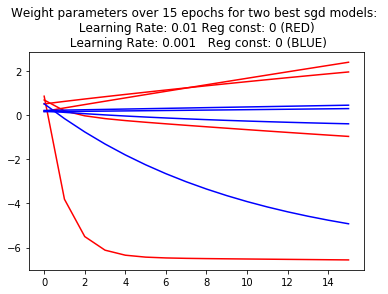

In [7]:
plot_weight_history(sgd_H1, sgd_H2, sgd_bestlr, sgd_bestrc, sgd_secbestlr, sgd_secbestrc, 'sgd' )

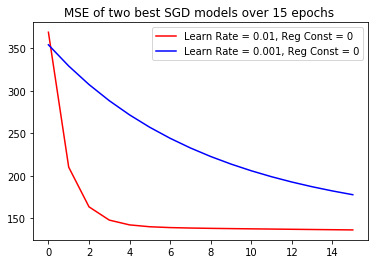

In [8]:
plot_MSE_history(sgd_H1, sgd_H2, sgd_bestlr, sgd_bestrc, sgd_secbestlr, sgd_secbestrc, 'SGD' )

## MSE and Weight Updates for SGD-Momentum

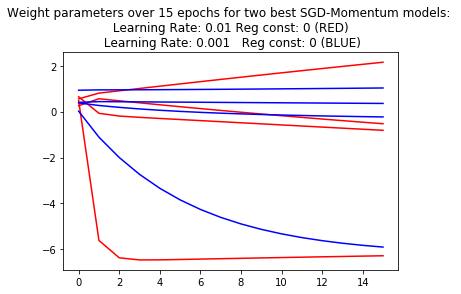

In [9]:
plot_weight_history(sgdM_H1, sgdM_H2, sgdM_bestlr, sgdM_bestrc, sgdM_secbestlr, sgdM_secbestrc, 'SGD-Momentum' )

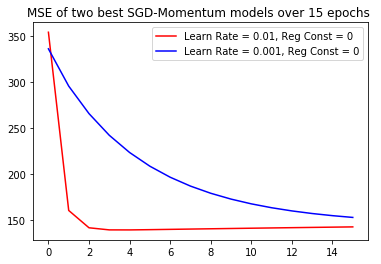

In [10]:
plot_MSE_history(sgdM_H1, sgdM_H2, sgdM_bestlr, sgdM_bestrc, sgdM_secbestlr, sgdM_secbestrc, 'SGD-Momentum' )

## MSE and Weight Updates for RMS-Prop

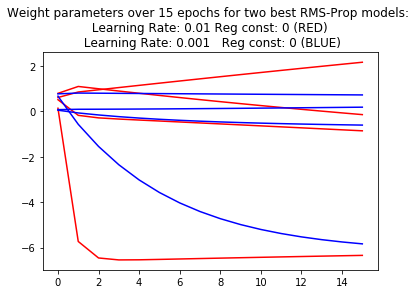

In [11]:
plot_weight_history(rmsP_H1, rmsP_H2, rmsP_bestlr, rmsP_bestrc, rmsP_secbestlr, rmsP_secbestrc, 'RMS-Prop' )

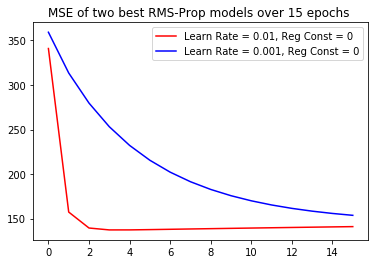

In [12]:
plot_MSE_history(rmsP_H1, rmsP_H2, rmsP_bestlr, rmsP_bestrc, rmsP_secbestlr, rmsP_secbestrc, 'RMS-Prop' )

# 1.3)
#### (2pts) Report the MSE at the end of 15 epochs for both combinations.

# 1.3) Answer

In [13]:
print('The lowest MSE we achieved with SGD was: ' + str(sgd_best))
print('The second lowest MSE we achieved with SGD was: ' + str(sgd_secbest))

The lowest MSE we achieved with SGD was: 141.36801980073295
The second lowest MSE we achieved with SGD was: 153.58144054988094


In [14]:
print('The lowest MSE we achieved with SGD-Momentum was: ' + str(sgdM_best))
print('The second lowest MSE we achieved with SGD-Momentum was: ' + str(sgdM_secbest))

The lowest MSE we achieved with SGD-Momentum was: 141.04616649238756
The second lowest MSE we achieved with SGD-Momentum was: 154.4189638861658


In [15]:
print('The lowest MSE we achieved with RMS-Prop was: ' + str(rmsP_best))
print('The second lowest MSE we achieved with RMS-Prop was: ' + str(rmsP_secbest))

The lowest MSE we achieved with RMS-Prop was: 140.85438305559893
The second lowest MSE we achieved with RMS-Prop was: 153.6313982346032


# 1.4) 
#### (3pts) Based on the experiments, which of the 3 techniques allowed for larger initial setting of the learning_rate? Why?

# 1.4) Answer

RMS-Prop did comparatively better for the same hyperparameters (specifically learning rate).
This is because RMS-Prop keeps a cache of the previous learning rates which immediately adjusts the learning rate to be smaller if the past several learning rates were very high. This means that if you set a very high initial learning rate, then the next iteration of SGD will have signifgantly smaller learning rates, preventing divergence.

In summary, adjusting the learning rate dynamically with rms-prop allows the model to quickly react to high learning rate values through self-regulation. 

# 1.5)
Now consider the following 2x2x1 network with one hidden layer. The input layer has two nodes, and the output layer has one node.

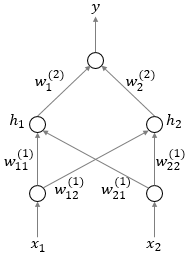

Both hidden layer units use a *sigmoid* activation function, and the output unit uses an identity activation (i.e. the output is just a weighted sum of the inputs).

(a) (2pts) Write the output $y$ as a function of the inputs $x_1$ and $x_2$.

(b) (2pts) Derive the update rule for the layer-one weight $w_{12}^{(1)}$.

# 1.5.a) Answer

Let S(x) be the sigmoid function. So: 

$S(x)=\dfrac{e^x}{e^x+1}$

The inputs to each hidden node are the inputs ($x_{1}$ and $x_{2}$) scaled by the weight on the edge connecting the input to the node.

So:

$h_{1} = x_{1}w_{11} + x_{2}w_{21}\\
\\
h_{2} = x_{1}w_{12} + x_{2}w_{22}$

The outputs of each hidden node is the summation of inputs passed through the Sigmoid function, S(x).

So:

$h_{1} = S(x_{1}w_{11} + x_{2}w_{21}) = \dfrac{e^{(x_{1}w_{11} + x_{2}w_{21})}}{e^{(x_{1}w_{11} + x_{2}w_{21})}+1}\\
\\
h_{2} = S(x_{1}w_{12} + x_{2}w_{22}) = \dfrac{e^{(x_{1}w_{12} + x_{2}w_{22})}}{e^{(x_{1}w_{12} + x_{2}w_{22})}+1}$


We know that y is simply the summation of the two outputs of $h_{1}$ and $h_{2}$, so:

$\hat{y} = w_1 h_{1} + w_2 h_{2} = \dfrac{w_1 e^{(x_{1}w_{11} + x_{2}w_{21})}}{e^{(x_{1}w_{11} + x_{2}w_{21})}+1} + \dfrac{w_2 e^{(x_{1}w_{12} + x_{2}w_{22})}}{e^{(x_{1}w_{12} + x_{2}w_{22})}+1}$


# 1.5.b) Answer

$\hat{y} = w_1 h_1 + w_2 h_2$

$\mathcal{L}$ = (y - $\hat{y})^2$ = $(y^2 - y w_1 h_1 - y w_2 h_2 - w_1 h_1 y +(w_1 h_1)^2 + w_1 h_1 w_2 h_2 - w_2 h_2 y + w_1 h_1 w_2 h_2 + (w_2 h_2)^2)$

We know that $\frac{\partial{h_1}}{\partial{w_{12}}} =$ 0 as $h_1$ does not depend upon $w_{12}$

$$\frac{\partial{h_2}}{\partial{w_{12}}} = \frac{\partial{S(x_{1} w_{12} + x_{2} w_{22})}}{\partial{w_{12}}}$$ Where $S(x)$ is the sigmoid function


$$ = \frac{\partial{(x_{1} w_{12} + x_{2} w_{22})}}{\partial{w_{12}}}S(x_{1} w_{12} + x_{2} w_{22})(1-S(x_{1} w_{12} + x_{2} w_{22})) $$
 
$$ = x_{1}S(x_{1} w_{12} + x_{2} w_{22})(1-S(x_{1} w_{12} + x_{2} w_{22})) $$


So, now to calculate the change in weight $w_{12}$ with respect to the $\mathcal{L}$

$\frac{\partial{\mathcal{L}}}{\partial{w_{12}}}$ = $\frac{\partial}{\partial{w_{12}}}(y^2 - y w_1 h_1 - y w_2 h_2 - w_1 h_1 y +(w_1 h_1)^2 + w_1 h_1 w_2 h_2 - w_2 h_2 y + w_1 h_1 w_2 h_2 + (w_2 h_2)^2)$

$\frac{\partial{\mathcal{L}}}{\partial{w_{12}}}$ = $\frac{\partial}{\partial{w_{12}}}(y^2 - 2 y w_1 h_1 - 2 y w_2 h_2 +(w_1 h_1)^2 + 2 w_1 h_1 w_2 h_2 + (w_2 h_2)^2)$

= $- 2 y w_2 \frac{\partial{h_2}}{\partial{w_{12}}} + 2 w_1 h_1 w_2\frac{\partial{h_2}}{\partial{w_{12}}} + w_2^2 \frac{\partial{h_{2}^2}}{\partial{w_{12}}}$

= $- 2 y w_2 \frac{\partial{h_2}}{\partial{w_{12}}} + 2 w_1 h_1 w_2\frac{\partial{h_2}}{\partial{w_{12}}} + 2 w_2^2 h_2 \frac{\partial{h_{2}}}{\partial{w_{12}}}$

We have calculated the value of $\frac{\partial{h_2}}{\partial{w_{12}}}$ above. Plugging in we arrive at:
$$\frac{\partial{\mathcal{L}}}{\partial{w_{12}}} = - y w_2 x_{1}S(x_{1} w_{12} + x_{2} w_{22})(1-S(x_{1} w_{12} + x_{2} w_{22})) + 2 w_1  w_2 x_{1} S(x_{1} w_{11} + x_{2} w_{21})S(x_{1} w_{12} + x_{2} w_{22})(1-S(x_{1} w_{12} + x_{2} w_{22})) + 2 w_2^2 x_{1}S(x_{1} w_{12} + x_{2} w_{22})^2(1-S(x_{1} w_{12} + x_{2} w_{22}))$$


So our update of $w_{12}$ is:

$ w_{12}' = w_{12} - \eta \left[ - y w_2 x_{1}S(x_{1} w_{12} + x_{2} w_{22})(1-S(x_{1} w_{12} + x_{2} w_{22})) + 2 w_1  w_2 x_{1} S(x_{1} w_{11} + x_{2} w_{21})S(x_{1} w_{12} + x_{2} w_{22})(1-S(x_{1} w_{12} + x_{2} w_{22})) + 2 w_2^2 x_{1}S(x_{1} w_{12} + x_{2} w_{22})^2(1-S(x_{1} w_{12} + x_{2} w_{22}))\right] $


# Question 2 - Multi-layer perceptron Regressor (15 pts)

In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python;
http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html.


We will use the OpenCL gemm kernel performance prediction dataset for this problem; https://archive.ics.uci.edu/ml/datasets/SGEMM+GPU+kernel+performance.

Following code will pre-process the data and split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 30** and **test_size = 0.25**.

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
%matplotlib inline

data = pd.read_csv('sgemm_product.csv') 
data['target'] = 0.25*(data['Run1 (ms)'] + data['Run2 (ms)']+ data['Run3 (ms)'] + data['Run4 (ms)'])
y = data['target']
y = y.as_matrix()
X = data.drop(['target','Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=30)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(181200, 14) (181200,) (60400, 14) (60400,)


One more thing to use in this problem is [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y. 

In [17]:
#Scale the Data
scaler = StandardScaler()
scaler.fit(X_train)

X_train_unscaled = X_train
X_test_unscaled = X_test

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
pass

# 2.1) 
(5pts) Use [sklearn.neural_nework.MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to do a 5-fold cross validation using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). The cross validation must be performed on the **training data**. Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=30, learning_rate_init = 0.005
    
Now, consider the following settings for the number of hidden units:
    
   (a) *hidden_layer_sizes = (2,)* 
   
   (b) *hidden_layer_sizes = (10,)*
   
   (c) *hidden_layer_sizes = (30,)*
   
   (d) *hidden_layer_sizes = (50,)*
   
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model.

In [18]:
hidden_units = [(2,), (10,), (30,), (50,)]
for hidden in hidden_units:
    RMSE_avg = []
    Kf = KFold(n_splits=5)
    for train_index, test_index in Kf.split(X_train):
        xtrain, xtest = X_train[train_index], X_train[test_index]
        ytrain, ytest = y_train[train_index], y_train[test_index]
        mlp = MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size=30, learning_rate_init = 0.005, hidden_layer_sizes=hidden)
        
        mlp.fit(xtrain,ytrain)
        
        ypred = mlp.predict(xtest)
        
        RMSE = np.sqrt(((ypred - ytest)**2).mean())
        RMSE_avg.append(RMSE)
    print("RMSE avg for hidden units: " + str(hidden) + " = " + str(np.array(RMSE_avg).mean()))

RMSE avg for hidden units: (2,) = 226.88101681563825
RMSE avg for hidden units: (10,) = 180.79277881689683
RMSE avg for hidden units: (30,) = 154.45108641324595
RMSE avg for hidden units: (50,) = 127.71263520683063


# 2.1) Answer
As you can see above, the RMSE for each of the 4 models after a 5-fold cross validation are:

(2,) $\rightarrow$ 226.88101681563825

(10,) $\rightarrow$ 180.79277881689683

(30,) $\rightarrow$ 154.45108641324595

(50,) $\rightarrow$ 127.71263520683063

# 2.2) 
(5pts) Now, using the same parameters used in part 1), train MLPRegressor models on the entire training set and report the RMSE score for both the trainnig and testing sets (again, use StandardScaler). Which of the four models ((a)-(d)) performs the best? Briefly analyze and discuss the results, commenting on the number of hidden units.

In [19]:
units = pd.DataFrame(columns = ["Hidden Units", "RMSE"])
hidden = 5
RMSE = 0.1
for i in range(0,10):
    units.append({"Hidden Units" : i, "RMSE" : i*np.pi**i}, ignore_index=True)

In [20]:
hidden_units = [(2,), (10,), (30,), (50,), (75,), (100,), (150,), (200,)]

for hidden in hidden_units:
    RMSE_avg = []
    
    mlp = MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size=30, learning_rate_init = 0.005, hidden_layer_sizes=hidden)

        
    mlp.fit(X_train, y_train)

    ypred = mlp.predict(X_test)

    RMSE = np.sqrt(((ypred - y_test)**2).mean())
    units = units.append({"Hidden Units" : hidden, "RMSE" : RMSE}, ignore_index=True)
    #print(units)
    print("RMSE avg for hidden units: "+ str(hidden) +" = " + str(RMSE))

RMSE avg for hidden units: (2,) = 236.80375368045753
RMSE avg for hidden units: (10,) = 147.4375148277914
RMSE avg for hidden units: (30,) = 157.45592801445355
RMSE avg for hidden units: (50,) = 123.90648794162024
RMSE avg for hidden units: (75,) = 62.91006726026061
RMSE avg for hidden units: (100,) = 48.65200120607412
RMSE avg for hidden units: (150,) = 39.16848812040657
RMSE avg for hidden units: (200,) = 41.09282519423528


In [23]:
#units.plot()
def strip(tup):
    return tup[0]

units["Hidden Units"] = units["Hidden Units"].apply(strip)

TypeError: 'int' object is not subscriptable

Text(0.5, 1.0, 'RMSE (x axis) vs Hidden Units (y axis) for MLPRegressor')

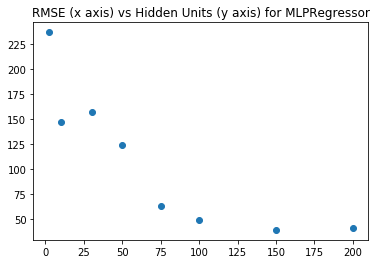

In [24]:
fig = plt.figure()
plt.scatter(units["Hidden Units"], units["RMSE"])
plt.title("RMSE (x axis) vs Hidden Units (y axis) for MLPRegressor")

## 2.2) Answer

Of the parameters we were asked to try, the model with 30 hidden units performed the best with a RMSE of ~140.29...

As stated in class, a MLP with enough hidden units is a universal approximator, but at some point, we should expect the model to begin overfitting with sufficiently many hidden units.

These results suggest that 30 hidden units may be optimal for our model. 

**However** I went ahead and tested out some higher values of hidden units and it seems like 50 hidden units is a small increase in an otherwise downward trending relationship between hidden units and RMSE.

I'm guessing that the rubric is looking for us to conclude that 30 is optimal, but I do not think it actually is after looking at some other values. 100 hidden units seems to be a good balance between very low RMSE and reasonable # of hidden units. (For example, if we double the hidden units, we barely decrease the RMSE, and for x1.5 the hidden units, RMSE goes up by almost half. 


# 2.3) 
(5pts) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot three curves using below conditions (a, b, c) in one figure, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_* valu;:

   (a) *hidden_layer_sizes = (1,)* 
   
   (b) *hidden_layer_sizes = (5,)*
   
   (c) *hidden_layer_sizes = (10,)*

In [25]:
hidden_units = [(1,), (5,), (10,)]
models = []
for hidden in hidden_units:
    RMSE_avg = []
    
    mlp = MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size=30, learning_rate_init = 0.005, hidden_layer_sizes=hidden)
    mlp.fit(X_train, y_train)
    models.append(((hidden), mlp))
    ypred = mlp.predict(X_test)

    RMSE = np.sqrt(((ypred - y_test)**2).mean())
    units.append({"hidden units" : hidden, "RMSE" : RMSE}, ignore_index=True)
    #print("RMSE avg for hidden units: "+ str(hidden) +" = " + str(RMSE))

# 2.3) Answer

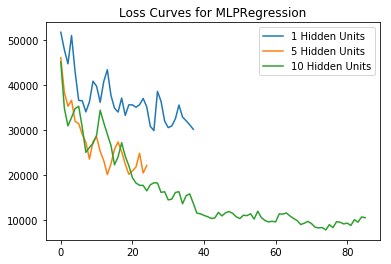

In [26]:
for model in models:
    plt.plot(model[1].loss_curve_, label = str(model[0][0])+" Hidden Units")
    
plt.title("Loss Curves for MLPRegression")
plt.xlabel = ('Epochs')
plt.legend()

# Question 3 - [Kaggle Competition] Nomad2018 Predicting Transparent Conductors (25 pts)

In this problem, we are going to explore a Kaggle competition: [Transparent Conductors](https://www.kaggle.com/c/nomad2018-predict-transparent-conductors). Your goal is to obtain the best score you can in this competition.

The first step is to make a Kaggle account. Then find this competition and read the competition details and the description of the dataset. 

Your work should meet the following requirements:

1. Data Preprocessing. 
 * Conduct some data preprocessing. (Hint: see if there is any skewed features and consider applying suitable transformation techniques to make them more "normal").
 * Impute the missing values (if any).
 * Create new features using interactions
2. Predictive Models. 
 * You have to create three models: Lasso regression, Ridge regression, and multilayer perceptron.  For Lasso and Ridge regression, optimize the alphas using cross validation. For the MLP model, you can use one hidden layer. You may try other predictive models to get better scores (optional).
3. Get a score of 0.0800 or lower on the Private Leaderboard. Take a screenshot of your private leaderboard after submission as proof. You can also click My Submissions tab to see the history of your submissions. It will show both Public Leaderboard & Private Leaderboard score.

Briefly describe your work on each of these steps. Explain (very briefly) what approaches you tried, what worked and what did not work. Mention your team's kaggle name and include a screen shot of your public submission score. Finally, try your best to win this competition!

# 3.1) Data Preprocessing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000219BB09E908>,
      dtype=object)

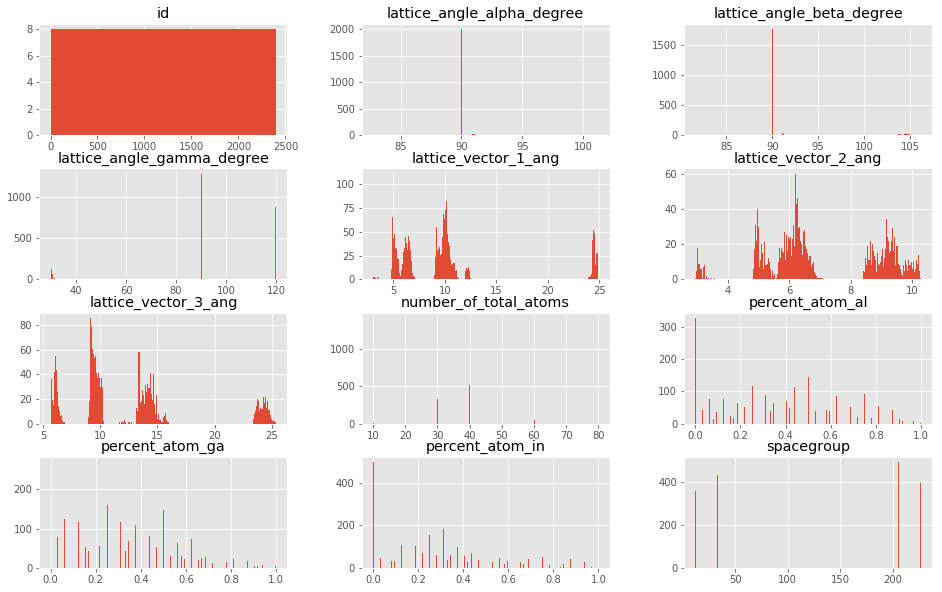

In [27]:
#Get data and separate features from labels
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from numpy import log1p
matplotlib.style.use('ggplot')

data = pd.read_csv('train.csv') 
train_Y1 = data.bandgap_energy_ev
train_X = data.drop('bandgap_energy_ev', axis=1)
train_Y2 = data.formation_energy_ev_natom
train_X = train_X.drop('formation_energy_ev_natom', axis=1)

train_X.hist(bins = 300, figsize=(16,10))

# id feature appears to hold no information, so we will drop it. Several of these features are multimodal, and the spacegroup feature appears to be a classifier. 

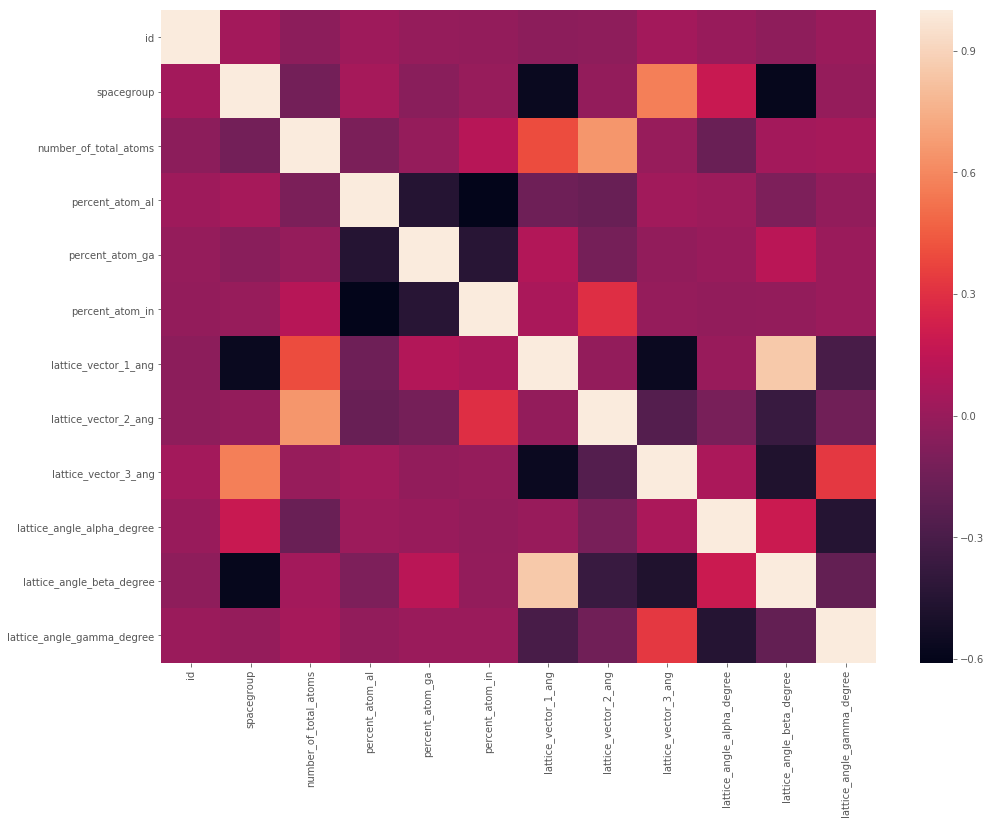

In [29]:
corr = train_X.corr()
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)

# (Above) There are several pairs of features which are highly correlated.

# (Below) We will fit a Random Forest model to evaluate how important each feature is to our labels.

In [30]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10, 20, 30]
min_samples_leaf = [1, 2, 4, 25, 50]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }


rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(train_X, train_Y1)

rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.8min finished


{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

In [31]:
from sklearn.model_selection import KFold

RMSLE_avg = []
Kf = KFold(n_splits=5)
for train_index, test_index in Kf.split(train_X):
    xtrain, xtest = train_X.loc[train_index], train_X.loc[test_index]
    ytrain, ytest = train_Y1.loc[train_index], train_Y1.loc[test_index]
    best_model = RandomForestRegressor(n_estimators=2000, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', max_depth=10, bootstrap=True)
    best_model.fit(xtrain, ytrain)    
        
    rf_ypred = best_model.predict(xtest)
        
    RMSLE = np.sqrt(((log1p(rf_ypred) - log1p(ytest))**2).mean())
    RMSLE_avg.append(RMSLE)
    
print('The RMSLE is: ' + str(pd.DataFrame(RMSLE_avg).mean()))

The RMSLE is: 0    0.091196
dtype: float64


In [33]:
importances = best_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Feature ranking:
1. feature 5 (0.303539)
2. feature 3 (0.203622)
3. feature 8 (0.113967)
4. feature 6 (0.090223)
5. feature 7 (0.081847)
6. feature 9 (0.058048)
7. feature 10 (0.051842)
8. feature 11 (0.031406)
9. feature 1 (0.024779)
10. feature 4 (0.024246)
11. feature 2 (0.011485)
12. feature 0 (0.004996)


IndexError: index 12 is out of bounds for axis 0 with size 12

In [34]:
data.corr()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
id,1.000000,0.042268,-0.037464,0.021495,-0.010629,-0.012250,-0.041701,-0.036477,0.041349,0.005916,-0.031354,0.008565,-0.008242,0.034987
spacegroup,0.042268,1.000000,-0.137534,0.052268,-0.053061,-0.005620,-0.570607,-0.012211,0.569755,0.183916,-0.584661,-0.007700,0.324927,-0.072725
number_of_total_atoms,-0.037464,-0.137534,1.000000,-0.106022,-0.012030,0.117657,0.397917,0.651364,-0.002656,-0.172047,0.039425,0.055687,-0.048631,-0.106125
percent_atom_al,0.021495,0.052268,-0.106022,1.000000,-0.450122,-0.609300,-0.154387,-0.179604,0.032261,0.019183,-0.099428,-0.019175,0.108481,0.738622
percent_atom_ga,-0.010629,-0.053061,-0.012030,-0.450122,1.000000,-0.433809,0.100244,-0.125285,-0.024424,0.000648,0.128669,0.010230,-0.374817,0.012831
percent_atom_in,-0.012250,-0.005620,0.117657,-0.609300,-0.433809,1.000000,0.066761,0.292472,-0.010866,-0.019929,-0.013933,0.010259,0.223383,-0.756668
lattice_vector_1_ang,-0.041701,-0.570607,0.397917,-0.154387,0.100244,0.066761,1.000000,-0.017117,-0.560387,0.002739,0.850079,-0.303708,-0.225600,-0.138901
lattice_vector_2_ang,-0.036477,-0.012211,0.651364,-0.179604,-0.125285,0.292472,-0.017117,1.000000,-0.256180,-0.114209,-0.365709,-0.146586,-0.104137,-0.127461
lattice_vector_3_ang,0.041349,0.569755,-0.002656,0.032261,-0.024424,-0.010866,-0.560387,-0.256180,1.000000,0.071834,-0.471228,0.328274,0.454679,-0.156865
lattice_angle_alpha_degree,0.005916,0.183916,-0.172047,0.019183,0.000648,-0.019929,0.002739,-0.114209,0.071834,1.000000,0.189144,-0.446694,0.099277,-0.072313


# After looking at feature importances and the correlation matrix of the data, we decided to remove 3 features (id, percent_atom_ga, and lattice_angle_beta_degree). We also decided to transform the spacegroup classifier and scale the rest of our features using StandardScaler.

In [38]:
le = preprocessing.LabelEncoder()
le.fit(train_X.spacegroup)
print(le.classes_)

train_X = train_X.drop('id', axis=1)
train_X = train_X.drop('percent_atom_ga', axis=1)
train_X = train_X.drop('lattice_angle_beta_degree', axis=1)
train_X.spacegroup = le.transform(train_X.spacegroup)

[0 1 2 3 4 5]


In [39]:
spacegroup = pd.DataFrame(train_X.spacegroup)
train_X = train_X.drop('spacegroup', axis=1)
train_X = pd.DataFrame(StandardScaler().fit_transform(train_X))
train_X = train_X.join(spacegroup)


# 3.2) Predictive Models

# Ridge Regression model with optimized alpha. The range (350-400) was found to be optimal over a wide range. For the sake of clarity and computing time, we limited our search to this range, but we initially optimized from 0 to 500.

In [40]:
from sklearn.model_selection import ShuffleSplit, cross_val_score, KFold
from sklearn.linear_model import  Ridge, Lasso
from sklearn.model_selection import train_test_split
from numpy import log1p

X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y1, test_size = .33, random_state=42)

#alphas  = np.logspace(-10, 8, num=100, base=2)
alphas = np.linspace(350,400,100)
Ridge_scores = pd.DataFrame(columns=['alpha','RMSLE'])

for alpha in alphas:
    RMSLE_avg = []
    Kf = KFold(n_splits=5)
    for train_index, test_index in Kf.split(train_X):
        xtrain, xtest = train_X.loc[train_index], train_X.loc[test_index]
        ytrain, ytest = train_Y1.loc[train_index], train_Y1.loc[test_index]
        clf = Ridge(alpha=alpha)
        
        clf.fit(xtrain,ytrain)
        
        ypred = clf.predict(xtest)
        
        RMSLE = np.sqrt(((log1p(ypred) - log1p(ytest))**2).mean())
        RMSLE_avg.append(RMSLE)
    Ridge_scores = Ridge_scores.append(pd.DataFrame(data={'alpha': [alpha], 'RMSLE': [RMSLE]}),ignore_index=True)

a = Ridge_scores['RMSLE'].idxmin(axis=1)
oa = str(Ridge_scores['alpha'][a])

print('Optimal Alpha: ' + oa)

Optimal Alpha: 388.8888888888889


<function matplotlib.pyplot.show(*args, **kw)>

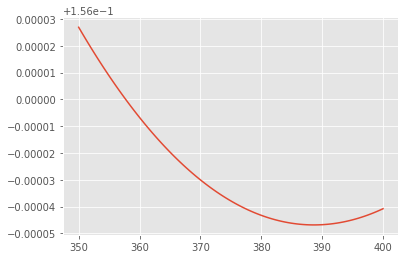

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(Ridge_scores['alpha'], Ridge_scores['RMSLE'])
plt.show

# Lasso model. Again, the alpha range has been optimized for clarity and computing time. We initially optimized over a wider range.

In [42]:
#alphas  = np.logspace(-10, 8, num=100, base=2)
alphas = np.linspace(.001,.01,100)
Lasso_scores = pd.DataFrame(columns=['alpha','RMSLE'])

for alpha in alphas:
    RMSLE_avg = []
    Kf = KFold(n_splits=5)
    for train_index, test_index in Kf.split(train_X):
        xtrain, xtest = train_X.loc[train_index], train_X.loc[test_index]
        ytrain, ytest = train_Y1.loc[train_index], train_Y1.loc[test_index]
        clf = Lasso(alpha=alpha)
        
        clf.fit(xtrain,ytrain)
        
        ypred = clf.predict(xtest)
        
        RMSLE = np.sqrt(((log1p(ypred) - log1p(ytest))**2).mean())
        RMSLE_avg.append(RMSLE)
    Lasso_scores = Lasso_scores.append(pd.DataFrame(data={'alpha': [alpha], 'RMSLE': [RMSLE]}),ignore_index=True)

a = Lasso_scores['RMSLE'].idxmin(axis=1)
oa = str(Lasso_scores['alpha'][a])
best = str(Lasso_scores['RMSLE'][a])

print('The optimal alpha (' + oa + ') yields an RMSLE score of: ' + best)

The optimal alpha (0.008727272727272728) yields an RMSLE score of: 0.1661223600517532


<function matplotlib.pyplot.show(*args, **kw)>

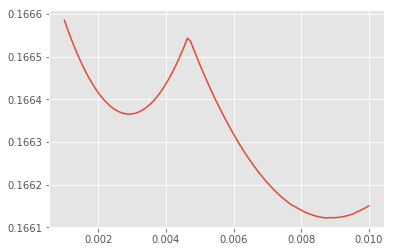

In [43]:
plt.plot(Lasso_scores['alpha'], Lasso_scores['RMSLE'])
plt.show

In [44]:
from sklearn.neural_network import MLPRegressor

RMSLE_avg = []
MLP_scores = pd.DataFrame(columns=['alpha','RMSLE'])

hidden_units = [2, 10, 30, 50]
for hidden in hidden_units:
    RMSLE_avg = []
    Kf = KFold(n_splits=5)
    for train_index, test_index in Kf.split(train_X):
        xtrain, xtest = train_X.loc[train_index], train_X.loc[test_index]
        ytrain, ytest = train_Y1.loc[train_index], train_Y1.loc[test_index]
        mlp = MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size=30, learning_rate_init = 0.005, hidden_layer_sizes=hidden)
        
        mlp.fit(xtrain,ytrain)
        
        ypred = mlp.predict(xtest)
        
        RMSLE = np.sqrt(((log1p(ypred) - log1p(ytest))**2).mean())
    MLP_scores = MLP_scores.append(pd.DataFrame(data={'hidden_units': [hidden], 'RMSLE': [RMSLE]}),ignore_index=True, sort=False)
a = MLP_scores['RMSLE'].idxmin(axis=1)
oa = str(MLP_scores['hidden_units'][a])
best = str(MLP_scores['RMSLE'][a])

print(oa + ' hidden units was optimal and yielded an RMSLE score of: ' + best)

30.0 hidden units was optimal and yielded an RMSLE score of: 0.0920007927602086


# 3.3) Kaggle

# Using our Random Forest Regressor and our MLP Regressor, we were able to get below the .08 score threshold on Kaggle. We submitted under the username calebj15, and a pdf with a screenshot of our score was submitted along with this notebook.

## Answer

# Question 4 - Bayes Decision Theory (10pts)

a. (2pts) Explain what you understand by class-conditional likelihood, class priors, and posterior probability of a class given an input, and the relationship between them. Please define all symbols and equations used explicitly.

b. (5pts) Suppose you want to learn a binary classifier to predict whether or not a customer will buy a TV. The class label is 0 if the patient does not buy and 1 if he/she does. For each customer, you are given two features, x1 is the per hour salary and x2 is the age. Assume that the class conditional distribution $p(x_1,x_2|C)$ is Gaussian. The mean salary and age of the people who do buy a TV is 40 and 27 respectively and that of those who don't is 16 and 20. Assume that both classes of customers have the same covariance given by the Identity matrix. Further, your sales data suggests that only 1 in 5 people actually bought a TV in the last few years. Mathematically derive the (optimal) Bayes decision boundary for this problem.

c. (3pts) Write a script to sample 100 customers from each class (C = 0; 1) under the assumed distribution and the estimated parameters and plot their features. Plot the decision boundary you obtained in the part (b) on the same plot.

# 4.a) 
(2pts) Explain what you understand by class-conditional likelihood, class priors, and posterior probability of a class given an input, and the relationship between them. Please define all symbols and equations used explicitly.

# 4.a Answer
#### $\bullet$ Class-conditional likelihood:
$P[C \vert I ]$ is the probability that given an input I, it's class will be C

This is essentially the likelihood of an input being classified C.

#### $\bullet$ Posterior probability of a class given input:
$P[I \vert C ]$ is the probability that you observe an input I given that the input is in class C

This is simply the likelihood of seeing an input with class C.
In other words, the ratio of inputs which are class C.

#### $\bullet$ Relationship between previous two:


In the monty hall game, the probability that any of the doors will have a car behind it is 1/3. This is an example of calculating the class-conditional probability of each door. In this example, each door is a possible input, (I do realize the analogy becomes fuzzy as the game only allows for selection of one door, I believe the analogy is still clear)

In the monty hall game, the correct move (which is to switch doors after one has been opened) is due to the posterior probability that the remaining door now has a car (which is 50%). The player has new information which has been taken into account and her probability has been updated.

In both cases, we can consider the contestant's individual consideration of a door, and we see that one time it's likelihood of having a car is 1/3, and another time, after the contestant has seen another datapoint be classified, the probability is updated and when considering the next door, it's probability of having a car is 1/2.

# 4.b) 
(5pts) Suppose you want to learn a binary classifier to predict whether or not a customer will buy a TV. The class label is 0 if the patient does not buy and 1 if he/she does. For each customer, you are given two features, x1 is the per hour salary and x2 is the age. Assume that the class conditional distribution $p(x_1,x_2|C)$ is Gaussian. The mean salary and age of the people who do buy a TV is 40 and 27 respectively and that of those who don't is 16 and 20. Assume that both classes of customers have the same covariance given by the Identity matrix. Further, your sales data suggests that only 1 in 5 people actually bought a TV in the last few years. Mathematically derive the (optimal) Bayes decision boundary for this problem.

# 4.b) Answer
Let $X_1$ correspond to income
Let $X_2$ correspond to age


p( $X_1,X_2 \vert\ C = 1$ ) = $\mathcal{N} \left( \mu_{(X_1 , X_2)} = \mu^{(1)}   = (40, 27), Cov = I^{(2x2)} \right)$ = $\mathcal{N}_{1}$

p( $X_1,X_2 \vert\ C = 0$ ) = $\mathcal{N} \left( \mu_{(X_1 , X_2)} = \mu^{(2)}  = (16, 20), Cov = I^{(2x2)} \right)$ = $\mathcal{N}_{2}$

We want the equation for the boundary where $\mathcal{N}_{1}$ = $\mathcal{N}_{2}$ $\rightarrow$ $\left( \mathcal{N}_{1} - \mathcal{N}_{2} \right)$ = 0

$\rightarrow$
$$ e^{ \frac{-1}{2}\left( \left( X_1 - \mu^{(1)}_{X_1} \right)^2 + \left( X_2 - \mu^{(1)}_{X_2} \right)^2 \right)} = e^{ \frac{-1}{2}\left(  \left( X_1 - \mu^{(2)}_{X_1} \right)^2 + \left( X_2 - \mu^{(2)}_{X_2} \right)^2 \right)} $$

$\rightarrow$
$$ 
\left(  X_1 - \mu^{(1)}_{X_1} \right)^2 + \left( X_2 - \mu^{(1)}_{X_2} \right)^2 = \left(   X_1 - \mu^{(2)}_{X_1} \right)^2 + \left( X_2 - \mu^{(2)}_{X_2} \right)^2 
$$

$\rightarrow$
$$ 
\left( X_{1}^{2} - 2\mu^{(1)}_{X_1}X_{1} + (\mu^{(1)}_{X_1})^2 \right) + \left( X_{2}^{2} - 2\mu^{(1)}_{X_2}X_{2} + (\mu^{(1)}_{X_2})^2 \right) = \left( X_{1}^{2} - 2\mu^{(2)}_{X_1}X_{1} + (\mu^{(2)}_{X_1})^2 \right) + \left( X_{2}^{2} - 2\mu^{(2)}_{X_2}X_{2} + (\mu^{(2)}_{X_2})^2 \right)
$$

$\rightarrow$
$$ 
\left( (X_{1}^{2} - X_{1}^{2}) - 2(\mu^{(1)}_{X_1} - \mu^{(2)}_{X_1})X_{1} + (\mu^{(1)}_{X_1})^2 - (\mu^{(2)}_{X_1})^2\right) + \left( (X_{2}^{2} - X_{2}^{2}) - 2(\mu^{(1)}_{X_2} - \mu^{(2)}_{X_2}) + (\mu^{(1)}_{X_2})^2 - (\mu^{(2)}_{X_2})^2\right) = 0
$$

$\rightarrow$
$$ 
\left(- 2(\mu^{(1)}_{X_1} - \mu^{(2)}_{X_1})X_{1} + (\mu^{(1)}_{X_1})^2 - (\mu^{(2)}_{X_1})^2\right) + \left(  - 2(\mu^{(1)}_{X_2} - \mu^{(2)}_{X_2})X_{2} + (\mu^{(1)}_{X_2})^2 - (\mu^{(2)}_{X_2})^2\right) = 0
$$

Let,

$- 2(\mu^{(1)}_{X_1} - \mu^{(2)}_{X_1}) = -2 (40 - 16 ) = -48$

$- 2(\mu^{(1)}_{X_2} - \mu^{(2)}_{X_2}) = -2 (27 - 20 ) = -14$

$(\mu^{(1)}_{X_1})^2 - (\mu^{(2)}_{X_1})^2 + (\mu^{(1)}_{X_2})^2 - (\mu^{(2)}_{X_2})^2  = 40^2 - 16^2 + 27^2 - 20^2 = 1,673 $

Then,

$$  -48 X_1 - 14 X_2 + 1673 = 0  $$

$$  48 X_1 + 14 X_2 = 1673  $$

$$  X_2 = \frac{-48}{16} X_1 + \frac{1673}{16}  $$

In other words, for a sample, with features $X_1$ and $X_2$

If $48X_1 + 14X_2 > 1673$ then, it is most likely in class C = 1

If $48X_1 + 14X_2 > 1673$ then, it is most likely in class C = 0 

If $48X_1 + 14X_2 = 1673$ then, it is a 50/50 chance of either case 

# 4.c) 
(3pts) Write a script to sample 100 customers from each class (C = 0; 1) under the assumed distribution and the estimated parameters and plot their features. Plot the decision boundary you obtained in the part (b) on the same plot.

# 4.c) Answer

In [45]:
x1, y1 = np.random.multivariate_normal([40,27], [[1,0],[0,1]], 1000).T
x2, y2 = np.random.multivariate_normal([16,20], [[1,0],[0,1]], 1000).T
xl = np.linspace(24,30,1000)
yl = [(-48./16.)*a + (1673./16.) for a in xl]

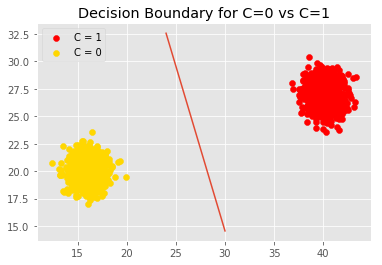

In [46]:
plt.scatter(x1,y1, color="Red", label="C = 1")
plt.scatter(x2,y2, color = "Gold", label="C = 0")
plt.legend()
plt.title("Decision Boundary for C=0 vs C=1")
plt.plot(xl,yl)